## FireProtDB - ddG Target Class (Multiclass classification) - K-Nearest Neighbors ##

In [6]:
#Initial setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

print("Setup Complete")

Setup Complete


In [14]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)

y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

## Optimal K ##

## Test size 20% ##

In [16]:
#Do not run this when testing random seeds
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

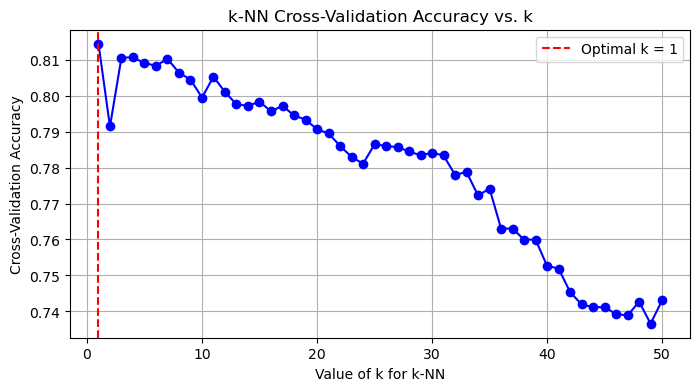

In [9]:
k_values = list(range(1, 51))
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]

# Plot the Cross-Validation Results
plt.figure(figsize=(8, 4))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Cross-Validation Accuracy vs. k')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
knn_best = KNeighborsClassifier()

knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

from sklearn.metrics import accuracy_score
print("K-Nearest Neighbors accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(knn_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_best.score(X_test, y_test)))

K-Nearest Neighbors accuracy: 0.842266
Training set score: 0.8393
Test set score: 0.8423


## Test size 30% ##

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

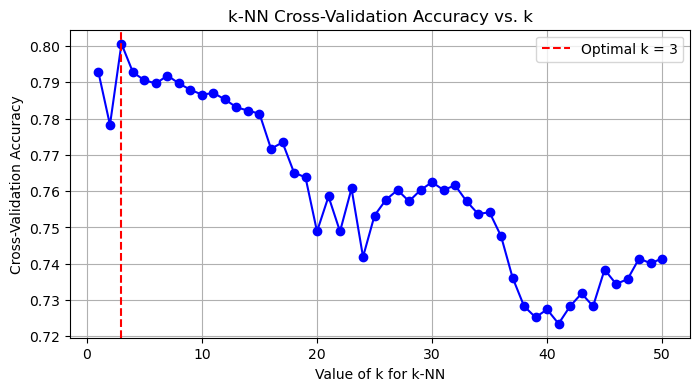

In [25]:
k_values = list(range(1, 51))
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]

# Plot the Cross-Validation Results
plt.figure(figsize=(8, 4))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Cross-Validation Accuracy vs. k')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
knn_best = KNeighborsClassifier(n_neighbors = optimal_k)

knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

from sklearn.metrics import accuracy_score
print("K-Nearest Neighbors accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(knn_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_best.score(X_test, y_test)))

K-Nearest Neighbors accuracy: 0.815117
Training set score: 0.8265
Test set score: 0.8151


## GridSearch for best parameters ##

In [15]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function: all points equal ('uniform') or closer ones weighted more ('distance')
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric used for neighbors
}

In [23]:
grid_search_cv = GridSearchCV(estimator=knn_best, param_grid=param_grid_knn, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Model:  KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Best Cross-Validation Accuracy: 0.82


## Best parameters ##

In [18]:
knn_best_params = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

knn_best_params.fit(X_train, y_train)
y_pred = knn_best_params.predict(X_test)

from sklearn.metrics import accuracy_score
print("K-Nearest Neighbors accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(knn_best_params.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_best_params.score(X_test, y_test)))

K-Nearest Neighbors accuracy: 0.854518
Training set score: 0.8631
Test set score: 0.8545


## Evaluation ##

**Default parameters**

In [34]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       216
           1       0.88      0.89      0.88       420
           2       0.64      0.53      0.58        17

    accuracy                           0.84       653
   macro avg       0.77      0.73      0.75       653
weighted avg       0.84      0.84      0.84       653



**Best parameters**

In [39]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       216
           1       0.89      0.89      0.89       420
           2       0.87      0.76      0.81        17

    accuracy                           0.85       653
   macro avg       0.85      0.82      0.83       653
weighted avg       0.86      0.85      0.85       653



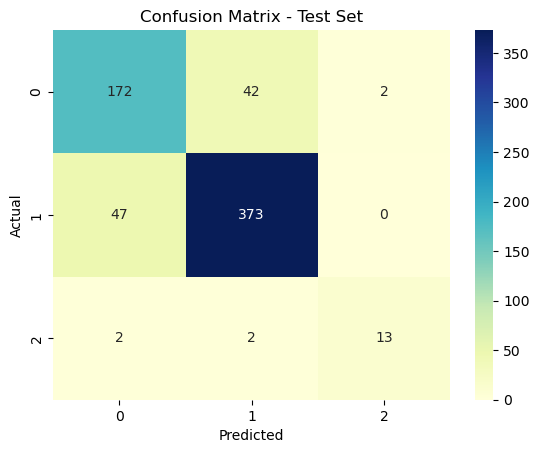

In [14]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature importance ##

In [14]:
baseline_acc = accuracy_score(y_test, knn_best_params.predict(X_test))
print(f"Baseline accuracy: {baseline_acc:.4f}")

Baseline accuracy: 0.8545


**Permutation feature importance**

In [38]:
feature_names = X_test.columns.tolist()
importances = []

for col in range(X_test.shape[1]):
    X_test_permuted = X_test.copy()
    X_test_permuted.iloc[:, col] = np.random.permutation(X_test_permuted.iloc[:, col])
    shuffled_acc = accuracy_score(y_test, knn_best_params.predict(X_test_permuted))
    importance = baseline_acc - shuffled_acc
    importances.append(importance)
    print(f"Feature '{feature_names[col]}' importance: {importance:.4f}")

Feature 'asa' importance: 0.2083
Feature 'b_factor' importance: 0.1394
Feature 'pH' importance: 0.0214
Feature 'Instability index' importance: 0.0077
Feature 'Isoelectric point' importance: 0.0031
Feature 'Hydrophobicity' importance: 0.0015
Feature 'Aromaticity' importance: 0.0015
Feature 'Molecular weight' importance: 0.0827
Feature 'Fraction helix' importance: 0.0015
Feature 'Fraction turn' importance: 0.0015
Feature 'Fraction sheet' importance: 0.0046


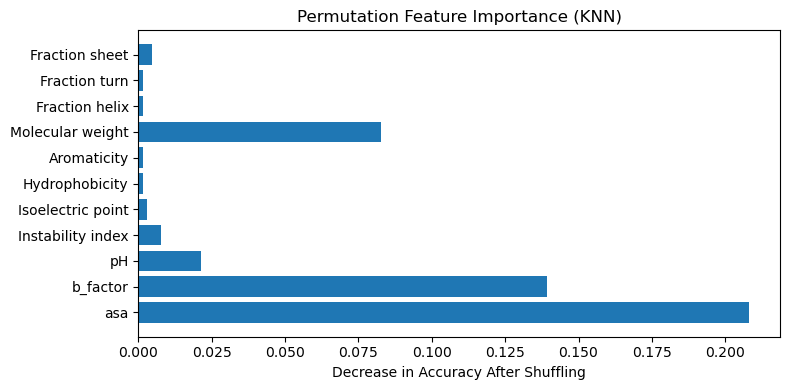

In [40]:
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel("Decrease in Accuracy After Shuffling")
plt.title("Permutation Feature Importance (KNN)")
plt.tight_layout()
plt.show()

## ROC Curve ##

In [125]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
classes = [0, 1, 2]

y_test_bin = label_binarize(y_test, classes=classes)
y_score = knn_best_params.fit(X_train, y_train).predict_proba(X_test)

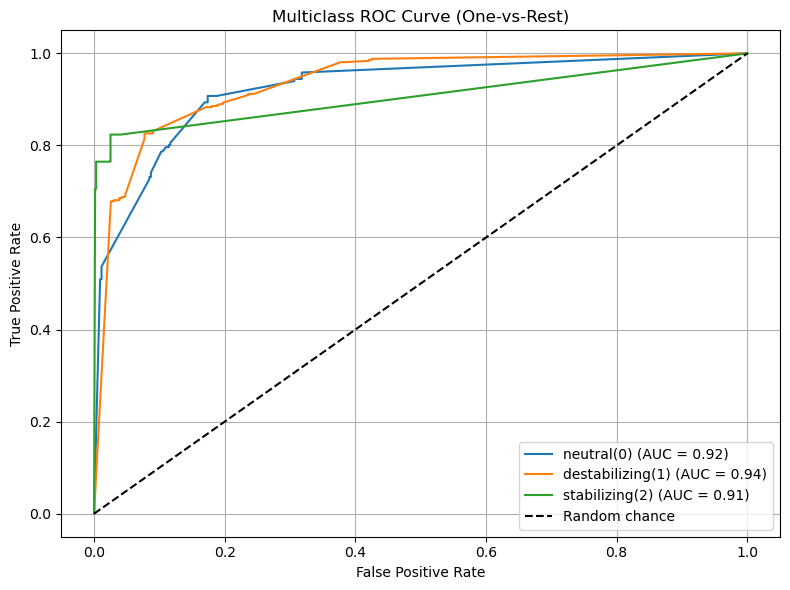

In [123]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    label_name = {0: "neutral(0)", 1: "destabilizing(1)", 2: "stabilizing(2)"}[class_label]
    plt.plot(fpr, tpr, label=f"{label_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Precision-Recall Curve ##

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score
)

classes = [0, 1, 2]
label_names = {0: "neutral(0)", 1: "destabilizing(1)", 2: "stabilizing(2)"}

y_test_bin = label_binarize(y_test, classes=classes)
y_score = knn_best_params.fit(X_train, y_train).predict_proba(X_test)

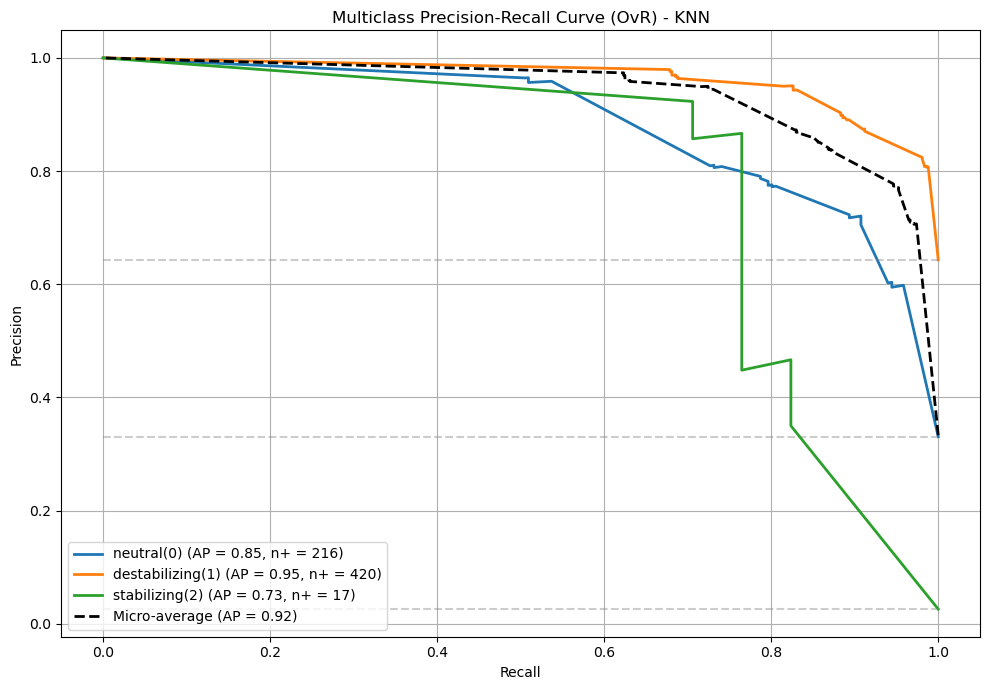

In [18]:
plt.figure(figsize=(10, 7))

# Plot PR curve for each class
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    positive_rate = y_test_bin[:, i].mean()  # for dashed baseline
    n_positives = int(y_test_bin[:, i].sum())  # count of positive samples

    plt.plot(
        recall,
        precision,
        lw=2,
        label=f"{label_names[class_label]} (AP = {avg_precision:.2f}, n+ = {n_positives})"
    )

    # Dashed baseline for positive class prevalence
    plt.hlines(
        positive_rate, 0, 1, colors='gray', linestyles='dashed', alpha=0.4
    )

# Micro-average Precision-Recall curve
precision_micro, recall_micro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_score.ravel()
)
ap_micro = average_precision_score(y_test_bin, y_score, average='micro')

plt.plot(
    recall_micro,
    precision_micro,
    color='black',
    linestyle='--',
    lw=2,
    label=f"Micro-average (AP = {ap_micro:.2f})"
)

# Final plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (OvR) - KNN")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()